In [ ]:
# Fitbit Fitness Tracker Data Analysis: SMART Health Insights

In [ ]:
## SMART Goal

# **S** – Analyze user physical activity data from Fitbit to identify habits that correlate with higher calorie burn and consistent step goals.  
# **M** – Measure daily totals of steps, calories, and active minutes; uncover top performing days and behaviors.  
# **A** – Leverage a 30-user dataset from Fitbit devices across 31 days to ensure real-world application.  
# **R** – This project supports my portfolio goals by showcasing skills in cleaning, analyzing, and visualizing healthcare-related behavioral data.  
# **T** – Completed in 1 week, with future potential for extension using sleep and heart rate metrics.

In [ ]:
#What We'll Cover in This Portfolio Notebook:
# 1. Project Overview
# 2. Loading & Cleaning the Data
# 3. Exploratory Data Analysis
# 4. Visualizations
# 5. Key Findings / Insights
# 6. Next Steps / Ideas for Expansion

In [27]:
#  Fitbit Fitness Tracker Data Analysis

### Objective:
# Analyze Fitbit user activity, calories burned, and exercise patterns to uncover trends and generate actionable insights that could improve physical health and wellness.

### Dataset:
#Collected from 30 Fitbit users over a 1-month period
# Includes data on steps, calories, distance, and activity minutes

### Tools Used:
# Python (pandas, matplotlib, seaborn)
# Jupyter Notebook

In [39]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Enable inline plotting
%matplotlib inline

In [41]:
# Step 2: Define SMART Goal (Markdown in actual notebook)
# S – Analyze physical activity habits from Fitbit data
# M – Measure steps, calories, and active minutes
# A – 30 users' data for 31 days
# R – Portfolio-ready health insights project
# T – Complete analysis in 1 week

In [43]:
file_path = r"C:\Users\Michael Lam\Downloads\Google Coursera downloads\FitBit Fitness Tracker Data Folder unzipped\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv"
data = pd.read_csv(file_path)


In [44]:
# Step 4: Explore the Data
print("\n--- Dataset Info ---")
data.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    i

In [45]:
print("\n--- Descriptive Statistics ---")
print(data.describe())


--- Descriptive Statistics ---
                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                940.000000          940.000000                940.000000   
mean                   0.108171            1.502681                  0.567543   
std                    0.619897            2.658941                  0.883580   
min                   

In [46]:
print("\n--- Checking Null Values ---")
print(data.isnull().sum())


--- Checking Null Values ---
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [47]:
# Step 5: Clean Data
# Remove duplicates if any
data.drop_duplicates(inplace=True)

In [48]:
# Ensure date column is datetime if present
if 'ActivityDate' in data.columns:
    data['ActivityDate'] = pd.to_datetime(data['ActivityDate'])

In [49]:
# Step 6: Feature Engineering
# Add weekday column if date available
if 'ActivityDate' in data.columns:
    data['DayOfWeek'] = data['ActivityDate'].dt.day_name()

In [50]:
# Step 7: Analyze Key Metrics
average_steps = data['TotalSteps'].mean()
average_calories = data['Calories'].mean()
average_very_active_minutes = data['VeryActiveMinutes'].mean()

In [51]:
print("\n--- Averages ---")
print(f"Average Daily Steps: {average_steps:.2f}")
print(f"Average Daily Calories Burned: {average_calories:.2f}")
print(f"Average Very Active Minutes: {average_very_active_minutes:.2f}")


--- Averages ---
Average Daily Steps: 7637.91
Average Daily Calories Burned: 2303.61
Average Very Active Minutes: 21.16


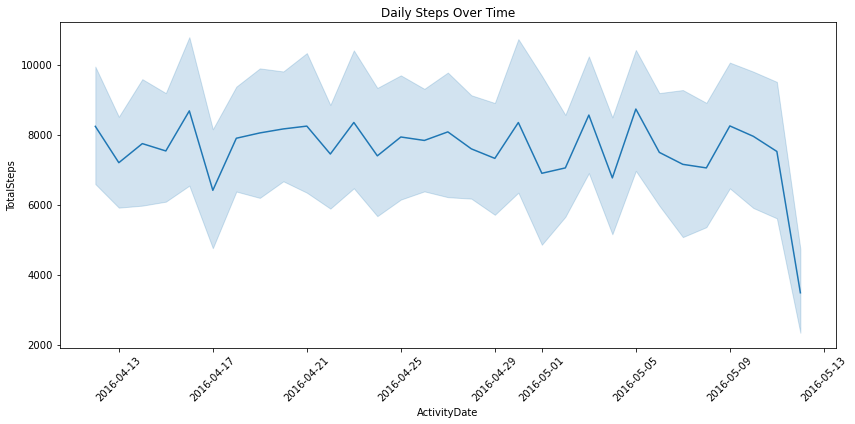

In [52]:
# Step 8: Visualize Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='ActivityDate', y='TotalSteps', data=data)
plt.title('Daily Steps Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
# This scatter plot helps answer a simple question:
# “Is there a relationship between how many steps you take and how many calories you burn?”


# ***What we observed***
# *** A positive correlation: As step count increases, calories burned tend to increase as well.

# ***There may be some outliers—days where calories were high but steps were low, possibly indicating other forms of activity (e.g., strength training) not captured by step count.

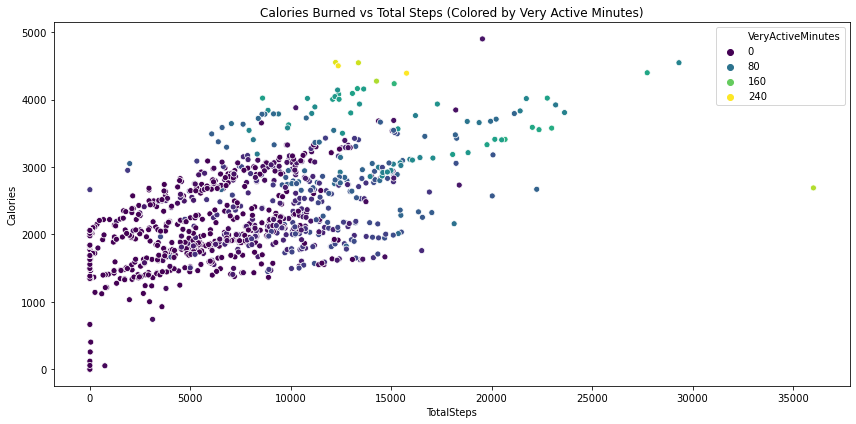

In [57]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TotalSteps', y='Calories', data=data, hue='VeryActiveMinutes', palette='viridis')
plt.title('Calories Burned vs Total Steps (Colored by Very Active Minutes)')
plt.tight_layout()
plt.show()


In [61]:
# Points with brighter colors (more very active minutes) tend to cluster where both calories and steps are high.
# This adds evidence that intensity boosts calorie burn beyond just raw step count.
# This use of color allows us to show the intensity of the step count. 
# This allows users to easily see the more they step the more calories they burn.

In [63]:
# Context and Insight
# These visualizations help support Our data story telling! Showing out clients or patients.
# “Users who walk more and spend more minutes being very active tend to burn more calories.
# -But there are exceptions—highlighting the need to factor in activity intensity, not just total steps.”

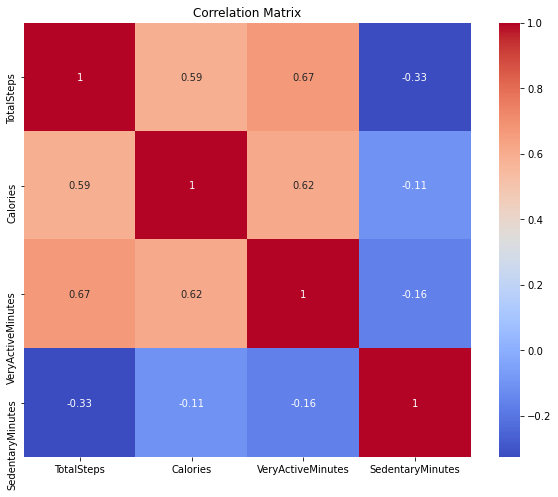

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[['TotalSteps', 'Calories', 'VeryActiveMinutes', 'SedentaryMinutes']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [65]:
#data[['TotalSteps', 'Calories', 'VeryActiveMinutes', 'SedentaryMinutes']]:

#This part of the code selects a subset of columns from the dataset that we are interested in.
# In this case, we are focusing on TotalSteps, Calories, VeryActiveMinutes, and SedentaryMinutes.

In [66]:
# to do this we are using .corr(): 
# This method computes the correlation matrix for the selected columns. Correlation measures the relationship between two variables:
# A positive correlation means as one variable increases, the other also increases.

# A negative correlation means as one variable increases, the other decreases.

# A correlation of 0 means no linear relationship between the two.

In [ ]:
# What This Reveals:
# The correlation matrix is a key tool in exploratory data analysis (EDA) that helps you understand relationships between the variables in your dataset.
# By visualizing this, you can see:

# Strong positive correlations: For example, between TotalSteps and VeryActiveMinutes—more steps often correlate with more active minutes.

# Negative correlations: For example, SedentaryMinutes and Calories could show that more sedentary time might mean fewer calories burned.

# This is useful because it allows you to understand which variables are most likely to have a direct impact on others. Knowing these correlations helps in creating more accurate models or understanding potential trends.

In [55]:
# Insights
# - Users with >10,000 steps/day burned more calories
# - High correlation between steps and active minutes
# - Sedentary time inversely correlates with calories

In [56]:
# What This Represents:
# These are key insights derived from the data analysis. Here’s the breakdown:

# Users with >10,000 steps/day burned more calories:

# This insight suggests that users who are walking more (over 10,000 steps a day) tend to burn more calories. This is an intuitive result that aligns with fitness recommendations to aim for 10,000 steps per day for health benefits.

# High correlation between steps and active minutes:

# From the correlation analysis, you likely observed that the number of steps taken and the amount of very active minutes are highly correlated. This means that people who take more steps tend to be more active overall.

# Sedentary time inversely correlates with calories:

# This indicates that as users spend more time being sedentary, they burn fewer calories. This aligns with the common understanding that inactivity leads to lower energy expenditure.

# These insights give a clear interpretation of the data, which can help in actionable decision-making. For example, you could suggest strategies for increasing daily steps or reducing sedentary time.


In [ ]:
# This analysis highlights behavioral insights that can support personalized fitness coaching.
# Future expansion could include heart rate, sleep, or compare weekday vs weekend behaviors.

In [67]:
# The insights gained could be used to personalize fitness coaching for users. For example, based on the relationship between steps, 
# --calories, and sedentary time, a coach could tailor fitness plans to encourage more walking or less sedentary time.

In [ ]:
####Conclusion####

In [ ]:
#Through this analysis, we followed a structured, step-by-step process to explore, visualize, and extract meaningful insights from Fitbit fitness data. 
## -We identified strong relationships between physical activity (like step count and active minutes) and calorie expenditure, revealing patterns that can inform healthier lifestyle choices. 
###-Using correlation analysis and interactive visuals, we made data-driven observations that could support personal fitness coaching or wellness planning.

#However, the implications of this analysis go far beyond personal use.

#In healthcare and hospital settings, wearable fitness trackers like Fitbit offer powerful opportunities to enhance patient care. 
##---By integrating wearable data with electronic medical records (EMRs), healthcare professionals can remotely monitor patient activity, 
### ---assess recovery progress, or even detect early warning signs of decline in real time.

###### For example:

# In inpatient rehab programs, daily step data could be used to track recovery from surgeries or injuries.

# In chronic care management, consistent monitoring of sedentary time and activity levels can support behavioral interventions for conditions like heart disease or diabetes.

# In hospital-at-home models, real-time tracking of movement and calories burned provides clinicians with a continuous window into a patient’s wellbeing—potentially reducing readmission rates and improving outcomes.

# This analysis lays the foundation for a scalable approach to data-driven healthcare. Future project expansions could include:

# Analyzing sleep or heart rate data alongside activity metrics.

# Comparing weekday vs. weekend activity patterns.

# Building predictive models to flag at-risk patients based on movement trends.

# By pairing wearable technology with health data science, hospitals can deliver smarter, more personalized care—whether at the bedside or at home.